## Importing libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations


## Importing data 

In [2]:
current_directory = os.getcwd()
file_name = 'dataset_project_eHealth20232024.csv'
df = pd.read_csv(os.path.join(current_directory, file_name))

random_state = 10
print("datashape: ", df.shape)
print(df.info())
n_samples = df.shape[0]

datashape:  (160, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 54 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        159 non-null    float64
 1   gender     160 non-null    int64  
 2   education  159 non-null    float64
 3   marital    160 non-null    int64  
 4   income     160 non-null    int64  
 5   phq_1      160 non-null    int64  
 6   phq_2      155 non-null    float64
 7   phq_3      159 non-null    float64
 8   phq_4      160 non-null    int64  
 9   phq_5      160 non-null    int64  
 10  phq_6      160 non-null    int64  
 11  phq_7      159 non-null    float64
 12  phq_8      159 non-null    float64
 13  phq_9      159 non-null    float64
 14  gad_1      159 non-null    float64
 15  gad_2      160 non-null    int64  
 16  gad_3      159 non-null    float64
 17  gad_4      159 non-null    float64
 18  gad_5      159 non-null    float64
 19  gad_6      159 non-null    f

# Data Cleaning

## Missing Data

In [3]:
# Sex and marital status -> average
# df_ccs['age'].fillna(df_ccs.mean()['age'])
# df_ccs['education'].fillna(df_ccs.median()['education'])
df['age'] = df['age'].fillna(df['age'].mean())
df['education'] = df['education'].fillna(df['education'].mean())

## Feature selection

In [4]:
# Feature Selection
columns_to_drop = df.columns[3:29] # Columns 5 to 41
columns_to_drop = columns_to_drop.insert(0, df.columns[1])
# columns_to_drop = columns_to_drop.append(df.columns[1])
# columns_to_drop = df.columns[0:42] # Columns 0 to 41
print(columns_to_drop)
df_ccs = df.drop(columns=columns_to_drop)
# df_ccs = df_ccs.dropna()
# print(df.head())
with pd.option_context('display.max_rows', 10,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_ccs)


Index(['gender', 'marital', 'income', 'phq_1', 'phq_2', 'phq_3', 'phq_4',
       'phq_5', 'phq_6', 'phq_7', 'phq_8', 'phq_9', 'gad_1', 'gad_2', 'gad_3',
       'gad_4', 'gad_5', 'gad_6', 'gad_7', 'eheals_1', 'eheals_2', 'eheals_3',
       'eheals_4', 'eheals_5', 'eheals_6', 'eheals_7', 'eheals_8'],
      dtype='object')
      age  education  heas_1  heas_2  heas_3  heas_4  heas_5  heas_6  heas_7  \
0    42.0        5.0     1.0     0.0     0.0       0       0       0       2   
1    51.0       18.0     0.0     1.0     2.0       0       0       2       0   
2    40.0        8.0     0.0     2.0     0.0       0       0       0       0   
3    19.0       25.0     0.0     0.0     3.0       3       3       3       3   
4    42.0       13.0     1.0     0.0     1.0       2       0       0       3   
..    ...        ...     ...     ...     ...     ...     ...     ...     ...   
155  29.0       18.0     3.0     3.0     3.0       2       2       3       3   
156  40.0       13.0     1.0     0.0  

## Reverse Scores

In [5]:
def reverse_score(string, max):
    # print(df_ccs[string])
    mean_value = (max)/2
    df_ccs[string] = df_ccs[string] - mean_value
    df_ccs[string] = - df_ccs[string]
    df_ccs[string] = df_ccs[string] + mean_value
    # print(df_ccs[string])

In [6]:
to_be_reversed = ['ccs_3', 'ccs_6', 'ccs_7', 'ccs_12', 'heas_1', 'heas_2', 'heas_3', 'heas_4', 'heas_5', 'heas_6', 'heas_7',
       'heas_8', 'heas_9', 'heas_10', 'heas_11', 'heas_12', 'heas_13']

for feature in to_be_reversed:
    if feature[:3] == 'ccs':
        reverse_score(feature, 6)
    else:
        reverse_score(feature, 3)

## Features Creation

In [7]:
data_ccs = pd.DataFrame() 
data_ccs['Age'] = df_ccs['age']
data_ccs['Education'] = df_ccs['education']
# data_ccs['Education'] = df_ccs['education']
data_ccs['Affective Symptoms'] = df_ccs[['heas_1', 'heas_2', 'heas_3', 'heas_4']].mean(axis=1)
data_ccs['Rumination'] = df_ccs[['heas_5', 'heas_6', 'heas_7']].mean(axis=1)
data_ccs['Behavioural Symptoms'] = df_ccs[['heas_8', 'heas_9', 'heas_10']].mean(axis=1)
data_ccs['Anxiety Personal Impact'] = df_ccs[['heas_11', 'heas_12', 'heas_13']].mean(axis=1)
data_ccs['Attribution Skepticism'] = df_ccs[['ccs_2', 'ccs_6', 'ccs_9']].mean(axis=1)
data_ccs['Impact Skepticism'] = df_ccs[['ccs_3', 'ccs_5', 'ccs_12']].mean(axis=1)
data_ccs['Trend Skepticism'] = df_ccs[['ccs_1', 'ccs_7', 'ccs_11']].mean(axis=1)
data_ccs['Response Skepticism'] = df_ccs[['ccs_4', 'ccs_8', 'ccs_10']].mean(axis=1)
# data_ccs['Income'] = df['income']
'''
dummies = pd.get_dummies(df.gender)
dummies = dummies.replace('True', 1)
dummies = dummies.replace('False', 0)
data_ccs['Male'] = dummies[0]
data_ccs['Female'] = dummies[1]
data_ccs['Non-binary'] = dummies[2]
dummies = pd.get_dummies(df.marital)
dummies = dummies.replace('True', 1)
dummies = dummies.replace('False', 0)
data_ccs['Single'] = dummies[0]
data_ccs['Married'] = dummies[1]
data_ccs['Divorced'] = dummies[2]
data_ccs['Widowed'] = dummies[3]
data_ccs['Separated'] = dummies[4]
'''
print(data_ccs)
data_ccs.to_csv('data_ccs.csv')


final_df = data_ccs.copy()
dummies = pd.get_dummies(df.gender)
dummies = dummies.replace('True', 1)
dummies = dummies.replace('False', 0)
final_df['Male'] = dummies[0]
final_df['Female'] = dummies[1]
final_df['Non-binary'] = dummies[2]
dummies = pd.get_dummies(df.marital)
dummies = dummies.replace('True', 1)
dummies = dummies.replace('False', 0)
final_df['Single'] = dummies[0]
final_df['Married'] = dummies[1]
final_df['Divorced'] = dummies[2]
final_df['Widowed'] = dummies[3]
final_df['Separated'] = dummies[4]
final_df['Income'] = df['income']
#print(final_df)
final_df.to_csv('final_df.csv')


      Age  Education  Affective Symptoms  Rumination  Behavioural Symptoms  \
0    42.0        5.0                2.75    2.333333              1.666667   
1    51.0       18.0                2.25    2.333333              3.000000   
2    40.0        8.0                2.50    3.000000              3.000000   
3    19.0       25.0                1.50    0.000000              2.333333   
4    42.0       13.0                2.00    2.000000              1.333333   
..    ...        ...                 ...         ...                   ...   
155  29.0       18.0                0.25    0.333333              0.000000   
156  40.0       13.0                1.75    2.000000              1.000000   
157  40.0       13.0                2.25    2.000000              2.666667   
158  41.0        8.0                2.75    2.666667              3.000000   
159  55.0        8.0                2.50    3.000000              3.000000   

     Anxiety Personal Impact  Attribution Skepticism  Impact Sk

# Exploratory Data Analysis

In [8]:
final_df.describe()

,Age,Education,Affective Symptoms,Rumination,Behavioural Symptoms,Anxiety Personal Impact,Attribution Skepticism,Impact Skepticism,Trend Skepticism,Response Skepticism,Income
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,38.924528,14.100629,1.899479,1.927083,1.903125,1.970833,2.127083,1.548958,2.157292,2.130208,29176.225000
std,10.750192,5.377796,0.869001,0.891510,0.913726,0.863611,1.185530,1.391624,1.181213,0.433435,9366.401336
min,18.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000
25%,31.000000,8.000000,1.250000,1.333333,1.333333,1.333333,1.000000,0.333333,1.333333,1.666667,23600.000000
50%,40.000000,13.000000,2.000000,2.000000,2.000000,2.000000,2.333333,1.000000,2.000000,2.166667,29000.000000
75%,49.000000,18.000000,2.750000,2.666667,3.000000,2.666667,3.000000,3.000000,3.333333,2.333333,35000.000000
max,55.000000,25.000000,3.000000,3.000000,3.000000,3.000000,4.000000,5.000000,5.000000,3.000000,56000.000000


### Univariate Analysis

Histograms (for the distributions)

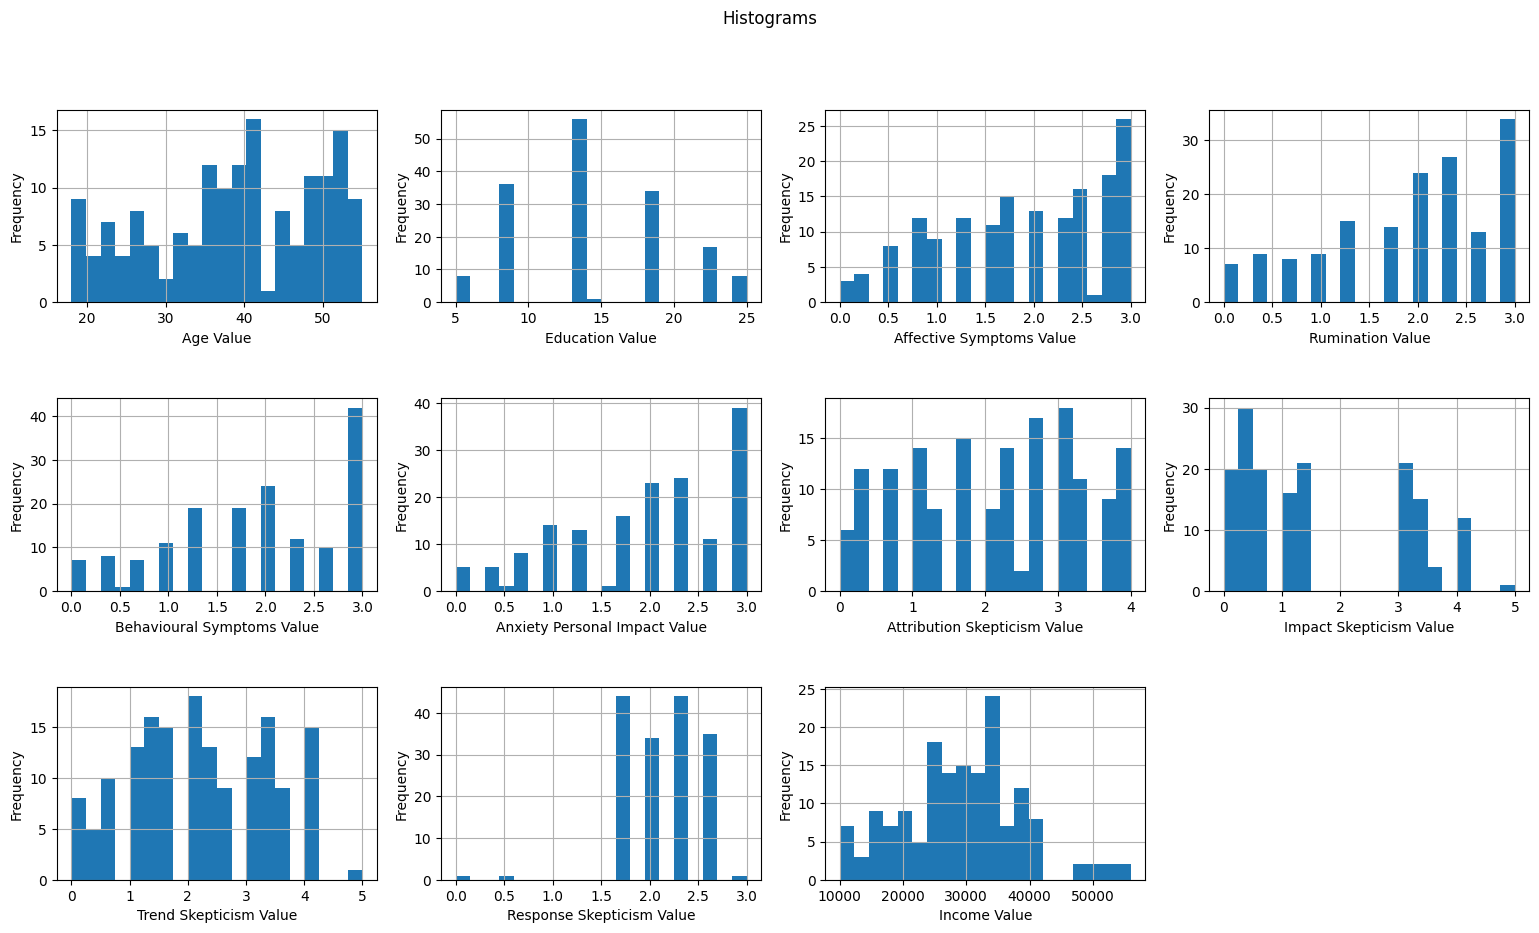

In [9]:
boolean_columns = final_df.select_dtypes(include='bool').columns
final_df = final_df.drop(columns=boolean_columns)

fig, axes = plt.subplots(3, 4, figsize=(19, 10), gridspec_kw={'hspace': 0.5})

for feature, ax in zip(final_df.columns, axes.flatten()):
    ax.hist(final_df[feature], bins=20)
    ax.set(xlabel=f"{feature} Value", ylabel="Frequency")
    ax.grid(True)

for j in range(len(final_df.columns), 3*4):
    fig.delaxes(axes.flatten()[j])

plt.suptitle("Histograms")
plt.show()

Box Plots (to help identify outliers)

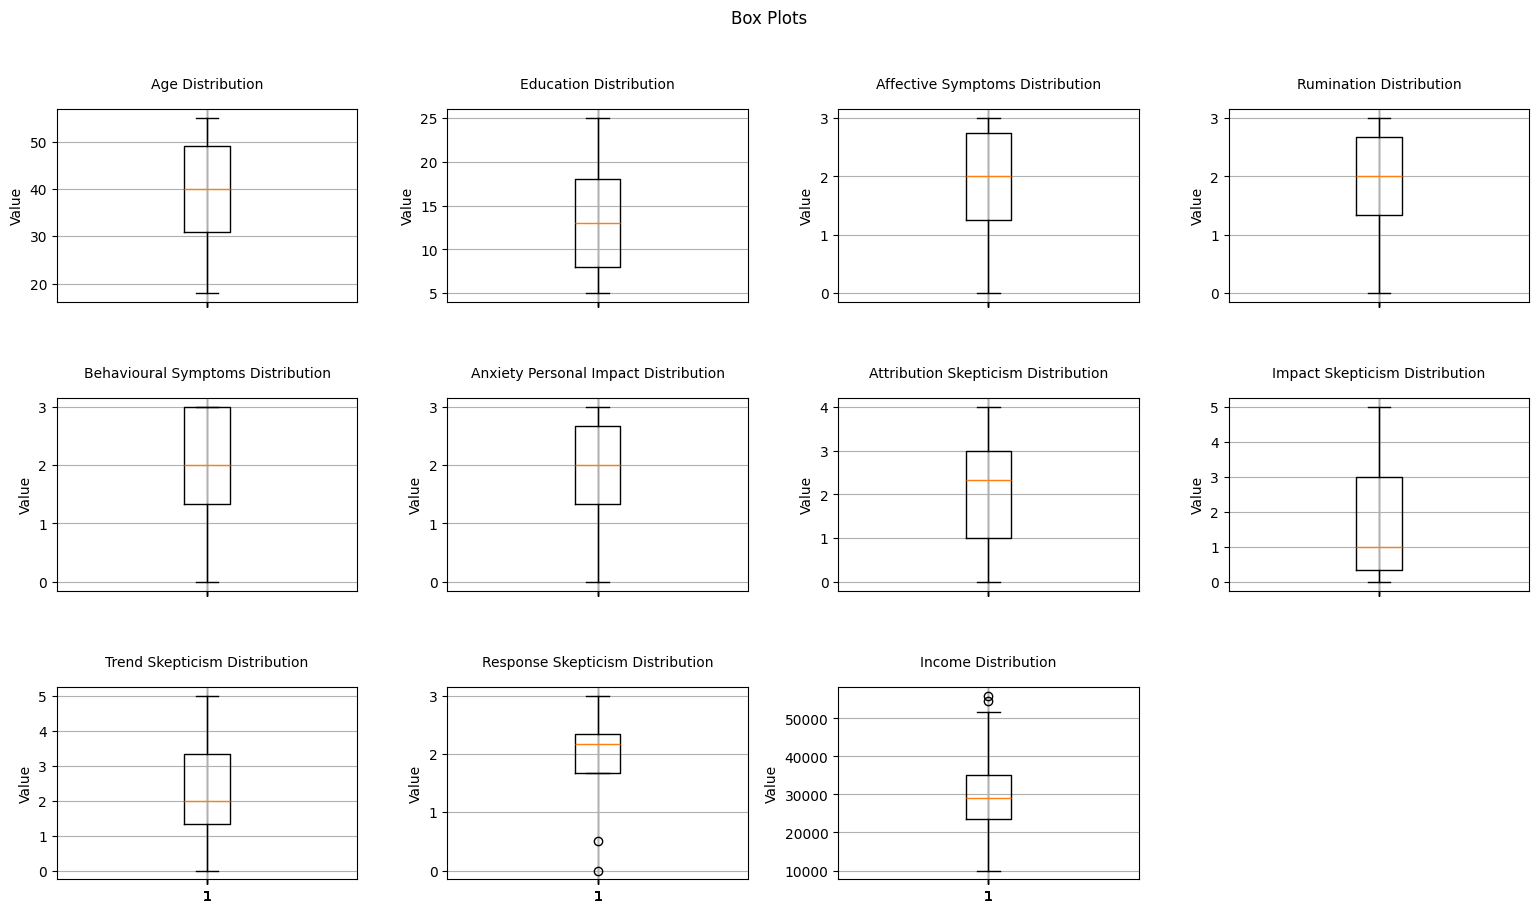

In [10]:
fig, axes = plt.subplots(3, 4, figsize=(19, 10), sharex=True, gridspec_kw={'hspace': 0.5, 'wspace': 0.3})

# Disegna i box plots
for feature, ax in zip(final_df.columns, axes.flatten()):
    ax.boxplot(final_df[feature])
    ax.set(xlabel="", ylabel=f"Value")
    ax.grid(True)
    ax.set_title(f"{feature} Distribution", fontsize=10, pad=15)  # 'pad' regola la distanza tra il titolo e l'asse

for j in range(len(final_df.columns), 3*4):
    fig.delaxes(axes.flatten()[j])
    
plt.suptitle("Box Plots")
plt.show()

### Bivariate Analysis

Numerical features

In [11]:
# Pearson's coefficient

columns_to_keep = ['Age','Income']
data_numerical = final_df[columns_to_keep]
print(data_numerical.columns)

column_pairs = list(combinations(data_numerical.columns, 2))
selected_pairs = []

for pair, ax in zip(column_pairs, range(len(column_pairs))):
    # compute correlation between columns i e j
    correlation = data_numerical[pair[0]].corr(data_numerical[pair[1]])
    #print(f"Correlation between {pair[0]} and {pair[1]}: {correlation}")
    
    # Verify if correlation is in the most relevant interval
    if 0.7 <= correlation <= 1.0 or -1.0 <= correlation <= -0.7:
        selected_pairs.append(pair)
        print(f"Correlation between {pair[0]} and {pair[1]}: {correlation}")
    else:
        print(f"Correlation between {pair[0]} and {pair[1]} is low")

Index(['Age', 'Income'], dtype='object')
Correlation between Age and Income is low


<Axes: >

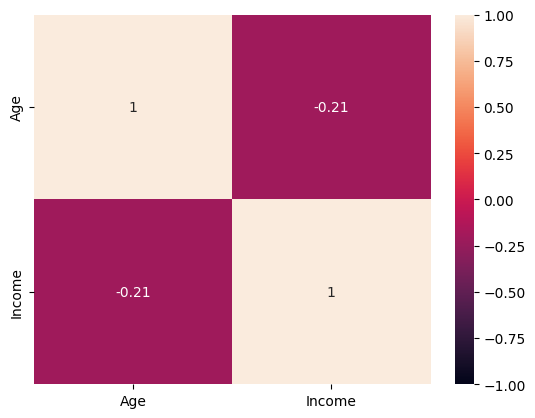

In [12]:
# Heatmap

plt.figure(4)
sns.heatmap(data_numerical.corr(), annot=True, vmin=-1, vmax=1)

Categorical features

In [13]:
columns_to_drop = ['Age','Income']
data_categorical = final_df.drop(columns=columns_to_drop)
print(data_categorical.columns)
categorical_columns = data_categorical.columns

# Create an empty dictionary to store contingency tables
contingency_tables_categorical = {}

# Iterate through all pairs of categorical columns
for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        # Create a key for the pair (assuming columns i and j)
        key = f"{categorical_columns[i]}_vs_{categorical_columns[j]}"
        
        # Create the contingency table
        contingency_tables_categorical[key] = pd.crosstab(data_categorical[categorical_columns[i]], data_categorical[categorical_columns[j]])

print(len(contingency_tables_categorical))

# Print or use the contingency tables as needed
#for key, table in contingency_tables_categorical.items():
#    print(f"Contingency Table for {key}:\n{table}\n")

Index(['Education', 'Affective Symptoms', 'Rumination', 'Behavioural Symptoms',
       'Anxiety Personal Impact', 'Attribution Skepticism',
       'Impact Skepticism', 'Trend Skepticism', 'Response Skepticism'],
      dtype='object')
36


In [14]:
# Create a folder to store CSV files
output_folder = 'contingency_tables'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Export each contingency table to a CSV file
for key, table in contingency_tables_categorical.items():
    output_path = os.path.join(output_folder, f"{key}.csv")
    table.to_csv(output_path)


In [15]:
# Read the CSV file into a pandas DataFrame
#results_df = pd.read_csv("path/to/EDA_fisher_results.csv")
current_directory_EDA = os.getcwd()
file_name_EDA = 'EDA_fisher_results.csv'
results_df = pd.read_csv(os.path.join(current_directory_EDA, file_name_EDA))
results_df.set_index('Table', inplace=True)

# Rename the index using the names of elements in 'contingency_tables_categorical'
results_df.index = [key for key in contingency_tables_categorical.keys()]

# Display the updated DataFrame
print(results_df)

# Iterate through rows in results_df
for row in results_df.itertuples():
    table_name = row.Index
    p_value = row.P_Value
    
    # Check if the p-value is less than the adjusted significance level
    if p_value < 0.05/(len(data_categorical.columns)-1):
        print(f"\n The features {table_name} are dependent.")
    else:
        print(f"\n The features {table_name} are independent.")



                                                    P_Value
Education_vs_Affective Symptoms                    0.000500
Education_vs_Rumination                            0.000500
Education_vs_Behavioural Symptoms                  0.000500
Education_vs_Anxiety Personal Impact               0.001000
Education_vs_Attribution Skepticism                0.062969
Education_vs_Impact Skepticism                     0.000500
Education_vs_Trend Skepticism                      0.000500
Education_vs_Response Skepticism                   0.000500
Affective Symptoms_vs_Rumination                   0.000500
Affective Symptoms_vs_Behavioural Symptoms         0.248376
Affective Symptoms_vs_Anxiety Personal Impact      0.000500
Affective Symptoms_vs_Attribution Skepticism       0.000500
Affective Symptoms_vs_Impact Skepticism            0.523738
Affective Symptoms_vs_Trend Skepticism             0.000500
Affective Symptoms_vs_Response Skepticism          0.000500
Rumination_vs_Behavioural Symptoms      